# Predicting the house price - SGD regressor model

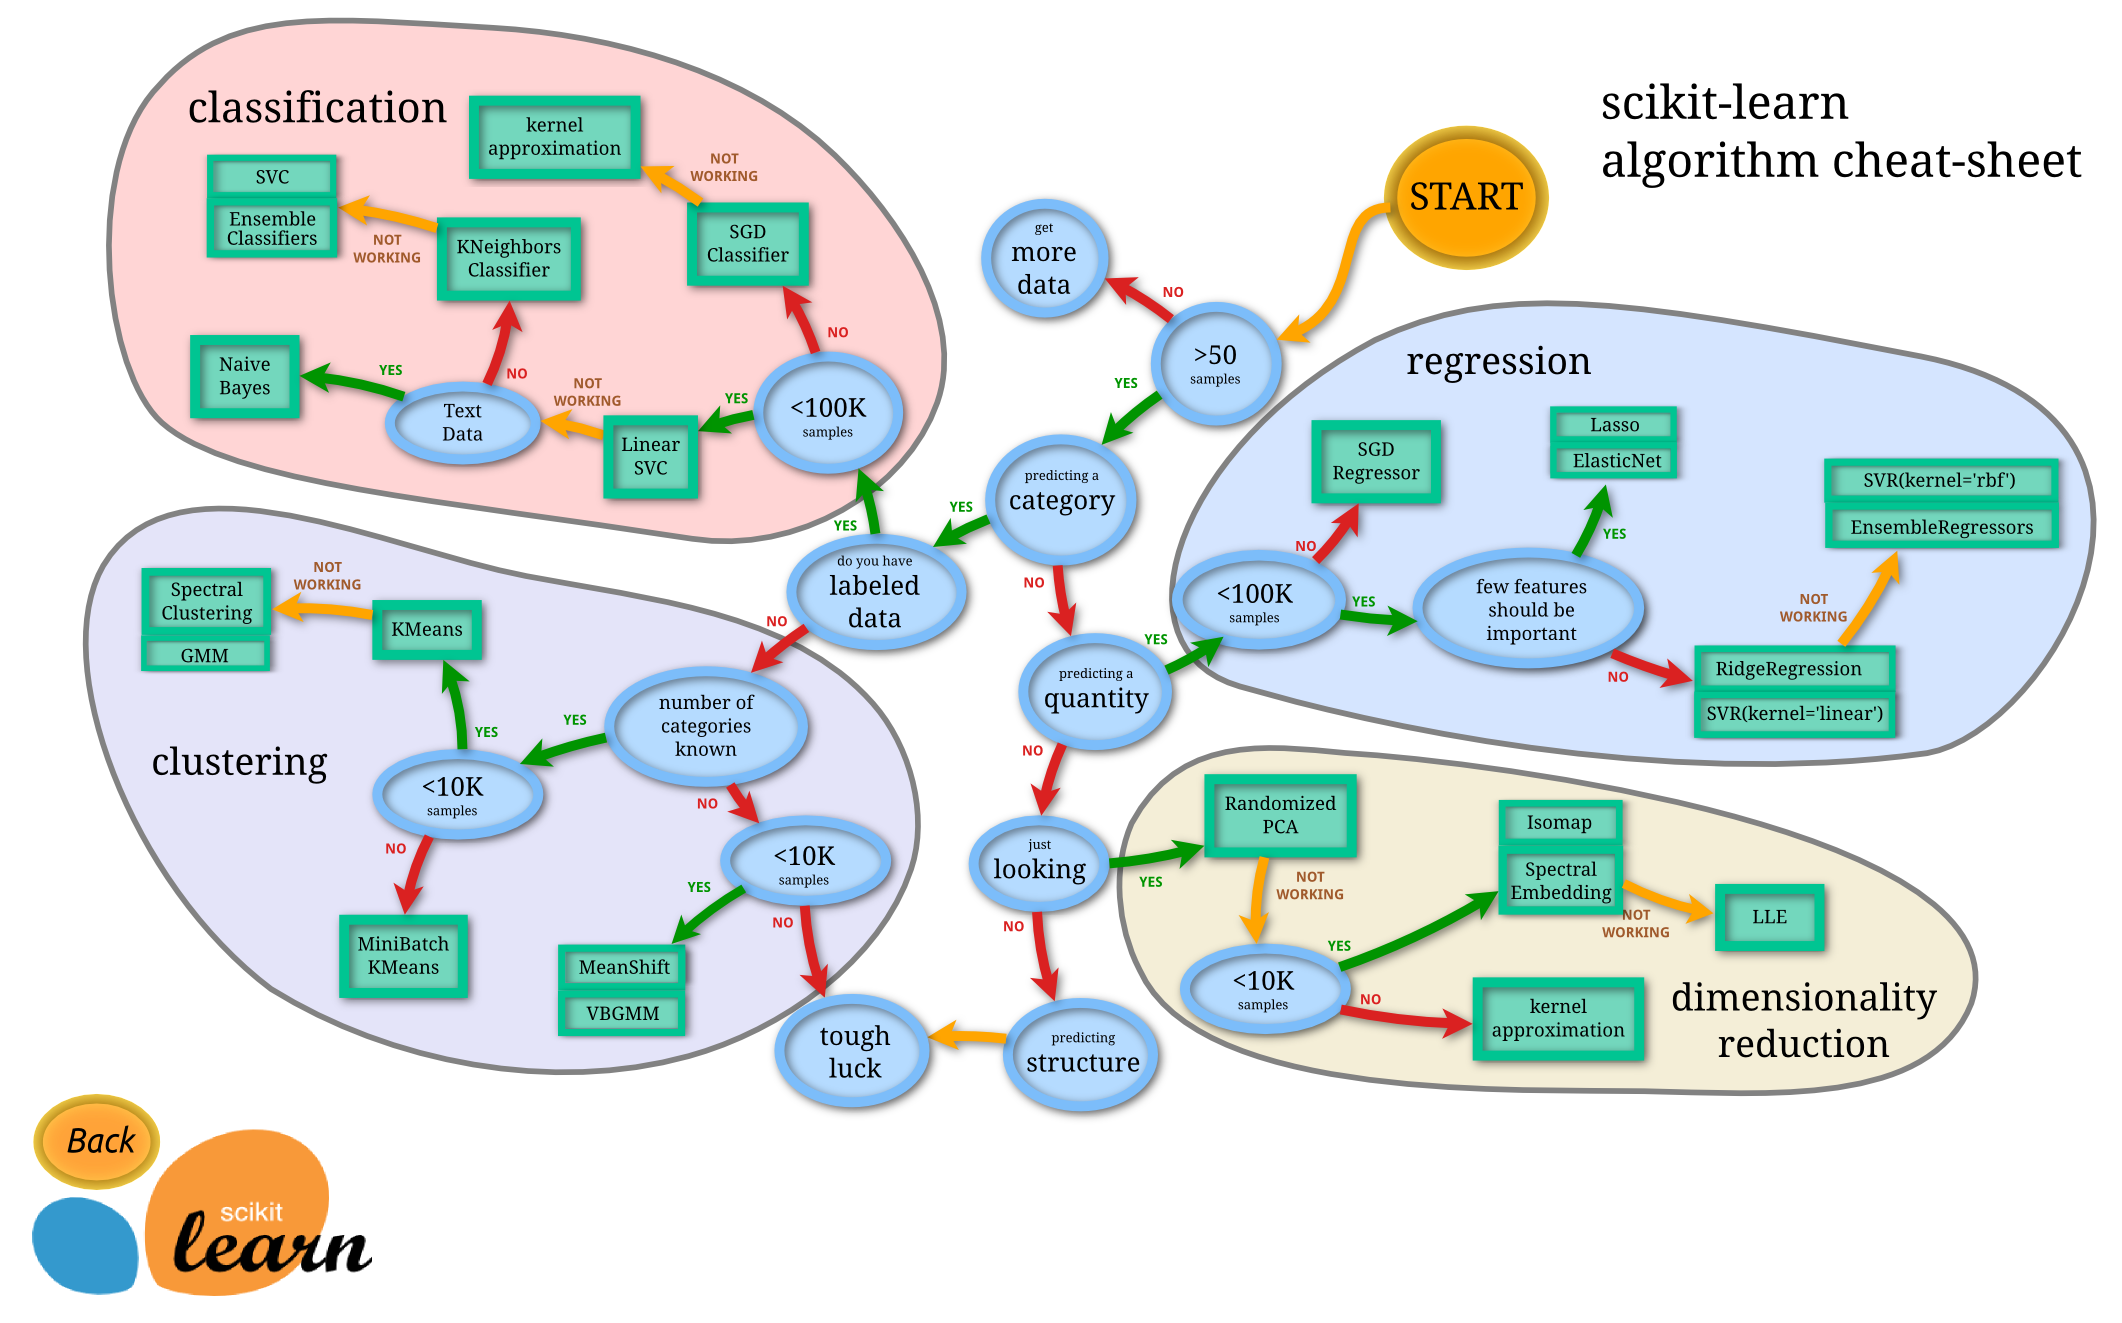

According to the famous algorithms map of scikit-learn, the SGD regressor model is the algorithm of choice for our dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
import pickle

%matplotlib inline

## Data import

In [5]:
#train data after cleaning as in p_h_p_data
feat = pd.read_csv('data/Features_xy.csv')
feat = feat.drop('Unnamed: 0',axis=1)
feat=feat.dropna()
X_feat = feat.drop(['Neighborhood','SalePrice'],axis=1)
y_feat = feat['SalePrice']

scaler = MinMaxScaler()

X_feat=scaler.fit_transform(X_feat)
y_feat=np.ravel(y_feat)

#test data after cleaning as in p_h_p_data
test_feat = pd.read_csv('data/Test_Features_xy.csv')
test_feat = test_feat.drop('Unnamed: 0',axis=1)

#train data after selecting variables correlated to target
feat_skimmed=pd.read_csv('data/Features_xy_skimmed.csv')
feat_skimmed = feat_skimmed.drop('Unnamed: 0',axis=1)
X_feat_skimmed=feat_skimmed.drop('SalePrice',axis=1)

scaler = MinMaxScaler()
X_feat_skimmed=scaler.fit_transform(X_feat_skimmed)

y_feat_skimmed=feat_skimmed['SalePrice']

#train data after removing redundant variables, identified as those strongly correlated to other variables (DCV)
feat_drop_corr_var=pd.read_csv('data/Features_xy_corr_drop.csv')
feat_drop_corr_var = feat_drop_corr_var.drop('Unnamed: 0',axis=1)
feat_drop_corr_var = feat_drop_corr_var.dropna()
X_dcv = feat_drop_corr_var.drop(['Neighborhood','SalePrice'],axis=1)

scaler = MinMaxScaler()
X_dcv=scaler.fit_transform(X_dcv)

y_dcv = feat_drop_corr_var['SalePrice']

#train data as transformed through PCA
X_pca = np.genfromtxt('data/Feature_x_PCA.csv', delimiter=',')
y_pca=pd.read_csv('data/train_y.csv')
y_pca=y_pca.drop('Unnamed: 0',axis=1)

#train data after selecting variables through backward elimination
X_BE=pd.read_csv('data/BE_feat_x.csv')
X_BE = X_BE.drop('Unnamed: 0',axis=1)

scaler = MinMaxScaler()
X_BE=scaler.fit_transform(X_BE)

y_BE=pd.read_csv('data/BE_train_y.csv')
y_BE=y_BE.drop('Unnamed: 0',axis=1)
y_BE=y_BE.values

#train data after selecting variables through recursive feature elimination
X_RFE=pd.read_csv('data/Features_xy_RFE.csv')
X_RFE = X_RFE.drop('Unnamed: 0',axis=1)
y_RFE=X_RFE['SalePrice']
X_RFE=X_RFE.drop('SalePrice',axis=1)

scaler = MinMaxScaler()
X_RFE=scaler.fit_transform(X_RFE)

#train data after selecting variables through LassoCV
X_lassoCV=pd.read_csv('data/LassoCV_feat_X.csv')
X_lassoCV=X_lassoCV.drop('Unnamed: 0',axis=1)

scaler = MinMaxScaler()
X_lassoCV=scaler.fit_transform(X_lassoCV)

y_lassoCV=pd.read_csv('data/LassoCV_train_y.csv')
y_lassoCV=y_lassoCV.drop('Unnamed: 0',axis=1)

In [6]:
dataset = [['std',X_feat,y_feat],
           ['Correlation skimmed',X_feat_skimmed,y_feat_skimmed],
           ['Redundancies removed',X_dcv,y_dcv],
           ['PCA transformed data',X_pca,y_pca],
           ['Backward elimination data',X_BE,y_BE],
           ['Recursive feature elimination data',X_RFE,y_RFE],
           ['LassoCV selected data',X_lassoCV,y_lassoCV]
          ]

## SGD model

In [7]:
def SGD_reg(X,y,data_name,rnd):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd)
    SGD = SGDRegressor(alpha= 1e-05, loss= 'squared_epsilon_insensitive', penalty= 'l2',early_stopping = True)
    SGD.fit(X_train, y_train)
    y_pred = SGD.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    return r2,mae

In [6]:
scores = pd.DataFrame(index=['R2', 'MAE'])
rdn_states = np.arange(0,30,1)

for item in dataset:
    r2_l = []
    mae_l = []
    data_name=item[0]
    X = item[1]
    y = item[2]
    for rdn in rdn_states:
        r2,mae = SGD_reg(X,y,data_name,rdn)
        r2_l.append(r2)
        mae_l.append(mae)
        
    r2_av=mean(r2_l)
    mae_av=mean(mae_l)
    scores.loc['R2',data_name]=r2_av
    scores.loc['MAE',data_name]=mae_av

C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [9]:
#scores - default parameters

,std,Correlation skimmed,Redundancies removed,PCA transformed data,Backward elimination data,Recursive feature elimination data,LassoCV selected data
R2,0.837634,0.806753,0.820382,0.837044,0.845049,0.827194,0.774875
MAE,20558.881984,23056.077102,21153.365882,21141.480167,20753.231190,22032.827916,24401.616019


The model is tested on the database and its various reduced versions, and the R2 socres and MAE appear similar for all the data versions. In the next part of the notebook I am using gridsearchCV to perform a model optimisation.

The second scores table shows how the use of optimal parameters obtained through gridsearchCV does not improve the model's metrics.

In [10]:
SGD = SGDRegressor(early_stopping = True)
X_train, X_test, y_train, y_test = train_test_split(X_pca,y_pca, test_size=0.2, random_state=1)

parameters = {'loss':('squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'), 'penalty':('l2','l1'),'alpha':[0.0001,0.001,0.00001]}
sgd_grid = GridSearchCV(SGD, parameters)
sgd_grid.fit(X_train,y_train)

C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=True, epsilon=0.1, eta0=0.01,
                                    fit_intercept=True, l1_ratio=0.15,
                                    learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 1e-05],
                         'loss': ('squared_loss', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'

In [11]:
sgd_grid.best_params_

{'alpha': 0.0001, 'loss': 'squared_epsilon_insensitive', 'penalty': 'l2'}

In [16]:
y_true, y_pred = y_test.to_numpy(), sgd_grid.predict(X_test)
#y_true =[float(i) for i in y_true]
print("R2 score: ",metrics.r2_score(y_true, y_pred.tolist()))
print("MAE: ",metrics.mean_absolute_error(y_true, y_pred.tolist()))

R2 score:  0.764071068333686
MAE:  20420.634930704342


## Making a prediction - example

In this part I am taking the test.csv file and use it to make a prediction suitable for submission with the model hereby developed.
For this prediction I will use the feature engineering that has performed the best so far, i.e. pca, but the method shown is easily reproduceable with all engineered datasets.   

After having made the prediction, I need to put in the required format for submission, meaning that I need to build a dataframe with column names and id reference.

In [8]:
SGD_pca = SGDRegressor(alpha= 0.0001, loss= 'squared_epsilon_insensitive', penalty= 'l2',early_stopping=True,validation_fraction=0.1)

In [10]:
X_test_pca = np.genfromtxt("data/test_pca.csv", delimiter=',')
def SGD_test(SGD,X_train,y_train,X_test):
    SGD.fit(X_train,y_train)
    y_pred = SGD.predict(X_test)

    return SGD,y_pred

In [11]:
SGD_pca,y_pred = SGD_test(SGD_pca,X_pca,y_pca,X_test_pca)

C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# save the SGD PCA model to disk
filename = 'models/pthp_SGD_pca_data.sav'
pickle.dump(SGD_pca, open(filename, 'wb'))

In [22]:
y_test_pca_df = pd.DataFrame(columns=['SalePrice'])

In [23]:
y_test_pca_df['SalePrice'] = (y_pred)
y_test_pca_df.index.names=['Id']

In [24]:
test_id=pd.read_csv('data/test_id.csv')
test_id.head()

,Unnamed: 0,Id
0,0,1022
1,1,1023
2,2,1024
3,3,1025
4,4,1026


In [25]:
y_test_pca_df.index = test_id['Id']

In [26]:
y_test_pca_df.head()

,SalePrice
Id,
1022,185720.419007
1023,124875.811719
1024,154362.199571
1025,222823.582830
1026,133529.219240


In [27]:
y_test_pca_df.to_csv('data/RN_SGD_pca_submission.csv')

## Making a prediction - second example

In [14]:
SGD_be = SGDRegressor(alpha= 1e-05, loss= 'squared_epsilon_insensitive', penalty= 'l2',early_stopping = True)

In [16]:
X_test_BE = pd.read_csv('data/X_test_BE.csv')
X_test_BE=X_test_BE.drop('Unnamed: 0',axis=1)
X_test_BE['MasVnrArea']=X_test_BE['MasVnrArea'].fillna(0)
scaler = MinMaxScaler()
X_test_BE_norm=scaler.fit_transform(X_test_BE)

def SGD_test(SGD,X_train,y_train,X_test):
    SGD.fit(X_train,y_train)
    y_pred = SGD.predict(X_test)

    return SGD,y_pred

In [17]:
SGD_be,y_pred_BE = SGD_test(SGD_be,X_BE,y_BE,X_test_BE_norm)

C:\Users\raffa\anaconda3\envs\py3_TF2\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# save the SGD BE model to disk
filename = 'models/pthp_SGD_BE_data.sav'
pickle.dump(SGD_be, open(filename, 'wb'))

In [31]:
y_test_BE_df = pd.DataFrame(columns=['SalePrice'])
y_test_BE_df['SalePrice'] = (y_pred_BE)
y_test_BE_df.index.names=['Id']
test_id=pd.read_csv('data/test_id.csv')
y_test_BE_df.index = test_id['Id']

y_test_BE_df.to_csv('data/RN_SGD_2submission.csv')

y_test_BE_df.head()

,SalePrice
Id,
1022,239108.789403
1023,109701.957856
1024,209719.392961
1025,251298.632472
1026,128686.697060
